11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8628 - loss: 0.4732
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9547 - loss: 0.1480
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9685 - loss: 0.1054
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9725 - loss: 0.0902
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9777 - loss: 0.0701
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9740 - loss: 0.0947
Test Accuracy: 0.9767000079154968
Test Loss: 0.0793507993221283
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


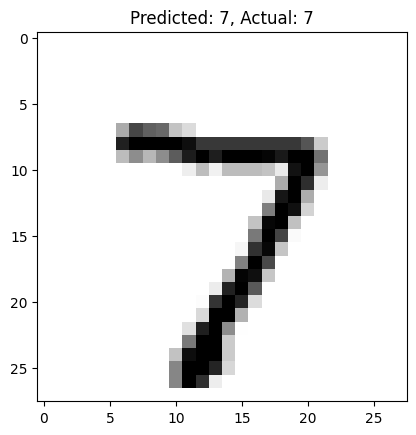

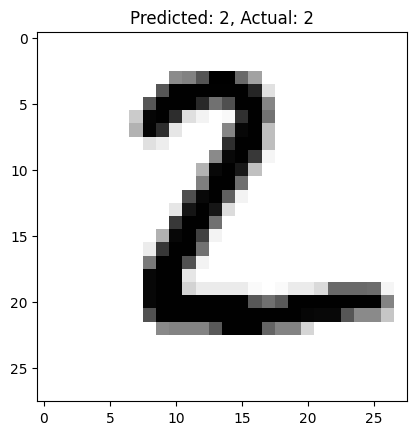

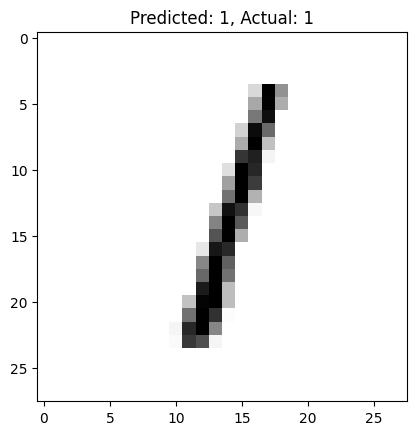

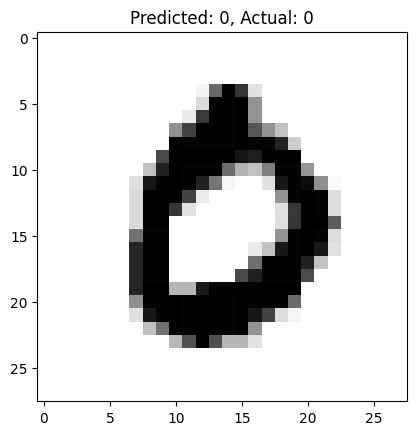

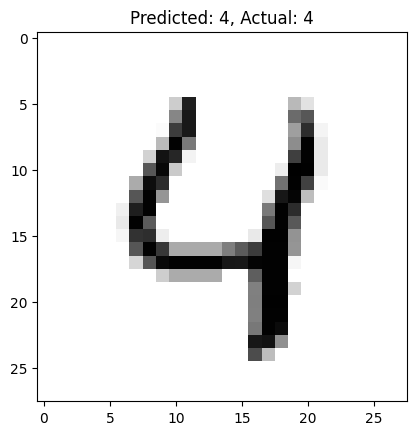

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 1: Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Step 2: Preprocess the data
# Rescale the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 3: Build the Neural Network Model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vector
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),  # Dropout to reduce overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(train_images, train_labels, epochs=5)

# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Step 7: Print the evaluation results
print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

# Step 8: Plot some predictions
predictions = model.predict(test_images)

# Plot the first 5 images with their predicted labels
for i in range(5):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.title(f"Predicted: {predictions[i].argmax()}, Actual: {test_labels[i]}")
    plt.show()
